In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

### Irreducible Matrix

In [2]:
is_irreducible_matrix <- function(mat) {
  n <- nrow(mat)
  
  # Check if the matrix is square
  if (n != ncol(mat)) {
    return("ERR_NOTSQUARE")
  }
  
  # Initialize a vector to store row and column sums
  row_sums <- rowSums(mat)
  col_sums <- colSums(mat)
  
  # Check if any row or column sum is zero
  if (any(row_sums == 0) || any(col_sums == 0)) {
    return(FALSE)
  }
  
  # Check irreducibility
  for (i in 1:n) {
    for (j in 1:n) {
      if (i != j && mat[i, j] == 0) {
        if (row_sums[i] == 1 && col_sums[j] == 1) {
          return(FALSE)
        }
      }
    }
  }
  
  # If no reducible structure found, the matrix is irreducible
  return(TRUE)
}

# Example usage:

your_matrix <- matrix(c(1, 1, 1, 1, 1, 1, 1, 1, 1), nrow = 3, ncol = 3, byrow = TRUE)
result <- is_irreducible_matrix(your_matrix)
result


[1] TRUE

### Reduced Matrix

In [3]:
reduced_matrix <- function(mat) {
  n <- nrow(mat)
  
  # Check if the matrix is square
  if (n != ncol(mat)) {
    return("ERR_NOTSQUARE")
  }
  
  # Initialize a vector to store row and column sums
  row_sums <- rowSums(mat)
  col_sums <- colSums(mat)
  
  # Check if any row or column sum is zero
  if (any(row_sums == 0) || any(col_sums == 0)) {
    return(FALSE)
  }
  
  # Check irreducibility
  for (i in 1:n) {
    for (j in 1:n) {
      if (i != j && mat[i, j] == 0) {
        if (row_sums[i] == 1 && col_sums[j] == 1) {
          return(TRUE)
        }
      }
    }
  }
  
  # If no reducible structure found, the matrix is irreducible
  return(FALSE)
}

# Example usage:

your_matrix <- matrix(c(1, 0, 0, 0, 1, 0, 0, 0, 1), nrow = 3, ncol = 3, byrow = TRUE)
result <- reduced_matrix(your_matrix)
result


[1] TRUE

### Shortest Paths

In [4]:
# Function calculates the number of shortest paths in a digraph
calculate_shortest_paths <- function(adjacency_matrix) {
  # Get the number of vertices in the graph
  n <- nrow(adjacency_matrix)

  # Initialize matrix to store the number of shortest paths
  num_shortest_paths_matrix <- matrix(0, ncol = n, nrow = n)

  # Iterate over all pairs of vertices
  for (i in 1:n) {
    for (j in 1:n) {
      if (i != j && adjacency_matrix[i, j] == 1) {
        # If there is a direct edge, there is one shortest path
        num_shortest_paths_matrix[i, j] <- 1
      } else if (i != j) {
        # Use dynamic programming to calculate the number of shortest paths
        num_shortest_paths_matrix[i, j] <- sum(sapply(1:n, function(k) {
          if (k != i && k != j && adjacency_matrix[i, k] == 1 && adjacency_matrix[k, j] == 1) {
            num_shortest_paths_matrix[i, k] * num_shortest_paths_matrix[k, j]
          } else {
            0
          }
        }))
      }
    }
  }

  return(num_shortest_paths_matrix)
}

# Example usage
adjacency_matrix <- matrix(c(0, 1, 1, 0, 0, 1, 0, 0, 1), nrow = 3, byrow = TRUE)
result_matrix <- calculate_shortest_paths(adjacency_matrix)

print("Adjacency Matrix:")
adjacency_matrix

print("Number of Shortest Paths Matrix:")
result_matrix


[1] "Adjacency Matrix:"


0,1,1
0,0,1
0,0,1


[1] "Number of Shortest Paths Matrix:"


0,1,1
0,0,1
0,0,0


### Primitive Matrix

In [5]:
# Function to calculate matrix exponentiation (non-negative integer power)
matrix_power <- function(matrix, power) {
  if (power == 0) {
    return(diag(nrow(matrix)))
  } else if (power > 0) {
    result <- matrix
    for (i in 2:power) {
      result <- result %*% matrix
    }
    return(result)
  } else {
    return("Power must be a non-negative integer.")
  }
}

# Function to check if a matrix is primitive
is_primitive_matrix <- function(matrix) {
  n <- nrow(matrix)

  # Check if the matrix is square
  if (n != ncol(matrix)) {
    stop("ERR_NOTSQUARE")
  }

  # Check if the matrix is non-negative
  if (any(matrix < 0)) {
    return("ERR_NOTNONNEG")
  }

  # Check if there exists a positive integer k such that all entries of A^k are positive
  for (k in 1:(n^2 - 1)) {
    if (all((matrix_power(matrix, k)) > 0)) {
      return(TRUE)
    }
  }

  return(FALSE)
}

# Example usage
m1 <- matrix(c(1, 0, 1, 1, 1, 1, 1, 1, 1), nrow = 3, byrow = TRUE)
m2 <- matrix(c(1, 0, 0, 1), nrow = 2, byrow = TRUE)
is_primitive_matrix(m1)
is_primitive_matrix(m2)

[1] TRUE

[1] FALSE

### Primitivity Index

In [6]:
# Function to calculate matrix exponentiation (non-negative integer power)
matrix_power <- function(matrix, power) {
  if (power == 0) {
    return(diag(nrow(matrix)))
  } else if (power > 0) {
    result <- matrix
    for (i in 2:power) {
      result <- result %*% matrix
    }
    return(result)
  } else {
    return("Power must be a non-negative integer.")
  }
}

# Function to find the primitivity index of a matrix
primitivity_index <- function(matrix) {
  n <- nrow(matrix)

  # Check if the matrix is square
  if (n != ncol(matrix)) {
    return("Input matrix is not square.")
  }

  # Check if the matrix is non-negative
  if (any(matrix < 0)) {
    return("Input matrix must have non-negative entries.")
  }

  # Find the primitivity index
  for (k in 1:(n^2 - 1)) {
    if (all((matrix_power(matrix, k)) > 0)) {
      return(k)
    }
  }

  return("Matrix is not primitive.")
}

# Example usage
#matrix1 <- matrix(c(1, 2, 3, 4), nrow = 2, byrow = TRUE)
#matrix2 <- matrix(c(0, 1, 0, 0), nrow = 2, byrow = TRUE)
#matrix3 <- matrix(c(1, 0, 1, 1, 1, 1, 1, 1, 1), nrow = 3, byrow = TRUE)
matrix4 <- matrix(c(0, 1, 0, 1, 0, 1, 1, 1, 0), nrow = 3, byrow = TRUE)

primitivity_index(matrix4)


[1] 4

### Perron-Frobenius

$type
[1] "Primitive"

$spectral_radius
[1] 5.372281

$perron_root
[1] 5.372281

$eigenvalues
[1]  5.3722813 -0.3722813

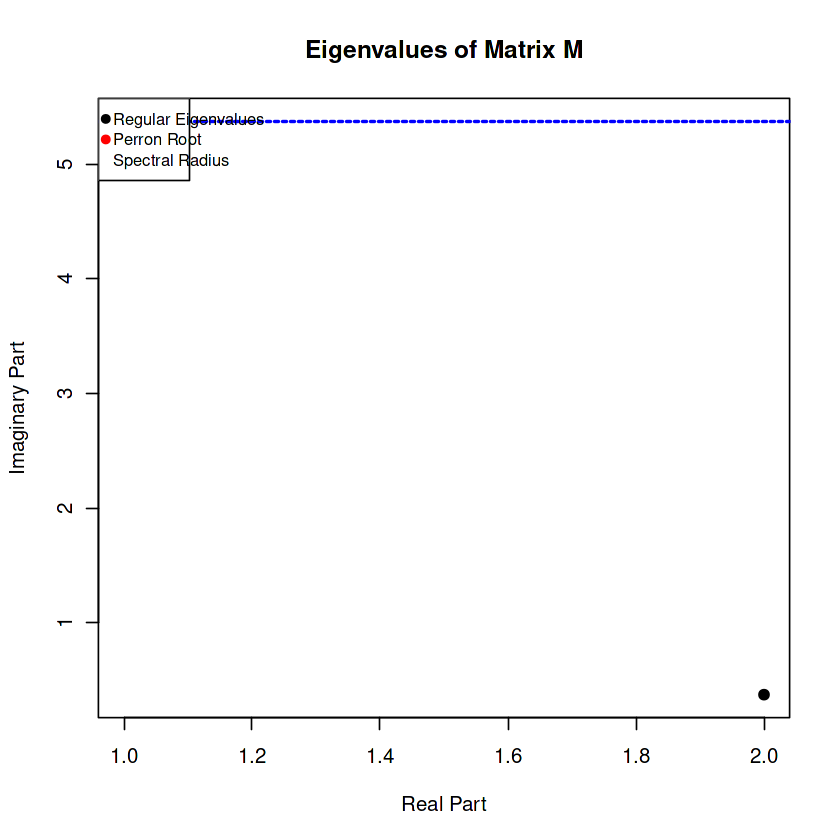

In [7]:
# Function to calculate matrix power iteratively
matrix_power <- function(matrix, exponent) {
  result <- matrix
  for (i in 2:exponent) {
    result <- result %*% matrix
  }
  return(result)
}

# Function to check if a matrix is primitive
is_primitive_matrix <- function(matrix) {
  n <- nrow(matrix)

  # Check if the matrix is square
  if (n != ncol(matrix)) {
    stop("Input matrix is not square.")
  }

  # Check if the matrix is nonnegative
  if (any(matrix < 0)) {
    stop("Input matrix must have non-negative entries.")
  }

  # Check irreducibility by examining matrix powers
  for (k in 1:(n^2 - 1)) {
    if (all((matrix_power(matrix, k)) > 0)) {
      return(TRUE)
    }
  }

  return(FALSE)
}

# Function to test Perron-Frobenius theorem on matrix M
Perron_Frobenius <- function(matrix) {
  n <- nrow(matrix)

  # Check if the matrix is square
  if (n != ncol(matrix)) {
    stop("Input matrix is not square.")
  }

  # Check if the matrix is nonnegative
  if (any(matrix < 0)) {
    return("The matrix is not nonnegative.")
  }

  # Check irreducibility by examining matrix powers
  irreducible <- all(sapply(2:(n - 1), function(k) any((matrix_power(matrix, k)) > 0)))

  if (irreducible) {
    # Check if the matrix is primitive
    primitive <- is_primitive_matrix(matrix)

    if (primitive) {
      perron_info <- list(
        type = "Primitive",
        spectral_radius = max(Mod(eigen(matrix)$values)),
        perron_root = max(Mod(eigen(matrix)$values)),
        eigenvalues = eigen(matrix)$values
      )
    } else {
      # Imprimitive case: distinguish "regular" eigenvalues from Perron root
      regular_eigenvalues <- eigen(matrix)$values[Mod(eigen(matrix)$values) != max(Mod(eigen(matrix)$values))]
      perron_root <- max(Mod(eigen(matrix)$values))
      perron_info <- list(
        type = "Imprimitive",
        spectral_radius = max(Mod(eigen(matrix)$values)),
        perron_root = perron_root,
        regular_eigenvalues = regular_eigenvalues,
        eigenvalues = eigen(matrix)$values
      )
    }

    # Plot spectral radius and eigenvalues
    plot(Mod(perron_info$eigenvalues), col = ifelse(Mod(perron_info$eigenvalues) == perron_info$perron_root, "red", "black"), pch = 19,
         xlab = "Real Part", ylab = "Imaginary Part", main = "Eigenvalues of Matrix M")
    abline(h = perron_info$spectral_radius, col = "blue", lty = 2, lwd = 2)
    text(Re(perron_info$spectral_radius) + 0.1, Im(perron_info$spectral_radius), labels = "Spectral Radius", pos = 2, col = "blue", cex = 0.7)

    if (perron_info$type == "Primitive") {
      text(Re(perron_info$perron_root), Im(perron_info$perron_root), labels = "Perron Root", pos = 3, col = "red", cex = 0.7)
    } else {
      text(Re(perron_info$perron_root), Im(perron_info$perron_root), labels = "Perron Root (Imprimitive)", pos = 3, col = "red", cex = 0.7)
    }

    legend("topleft", legend = c("Regular Eigenvalues", "Perron Root", "Spectral Radius"), col = c("black", "red", "blue"), pch = c(19, 19, NA), cex = 0.8)

    return(perron_info)
  } else {
    return("The matrix is not irreducible.")
  }
}

# Example 

matrix3 <- matrix(c(1, 2, 3, 4), nrow = 2, byrow = TRUE)

Perron_Frobenius(matrix3)


### Vector Norm

In [8]:
# Function to compute vector norms of a matrix considered as a vector in C^n^2
vector_norm <- function(matrix, norm) {
  n <- nrow(matrix)
  m <- ncol(matrix)

  # Flatten the matrix to a vector
  vector_M <- as.vector(matrix)

  # Compute the requested vector norm
  if (norm == 1) {
    return(sum(abs(vector_M)))
  } else if (norm == 2) {
    return(sqrt(sum(abs(vector_M)^2)))
  } else if (norm == Inf) {
    return(max(abs(vector_M)))
  } else {
    stop("Invalid norm. Use norm = 1, 2, or Inf.")
  }
}

# Example 
matrix1 <- matrix(c(1, -2, 3, 4, 0, -1), nrow = 2, ncol = 3, byrow = TRUE)

# Compute vector norms with norm type as an argument

vector_norm(matrix1, 1)
vector_norm(matrix1, 2)
vector_norm(matrix1, Inf)

[1] 11

[1] 5.567764

[1] 4

### Matrix Norm

In [9]:
# Function to compute Matrix norms 
matrix_norm <- function(matrix, norm) {
  n <- nrow(matrix)
  m <- ncol(matrix)

  # Flatten the matrix to a vector
  vector_M <- as.vector(matrix)

  # Compute the requested vector norm
  if (norm == 1) {
    return(max(colSums(abs(matrix))))
  } else if (norm == 2) {
    return(sqrt(sum(abs(vector_M)^2)))
  } else if (norm == Inf) {
    return(max(rowSums(abs(matrix))))
  } else {
    stop("Invalid norm. Use norm = 1, 2, or Inf.")
  }
}

# Example 
matrix1 <- matrix(c(1, -7, -2, -3), nrow = 2, byrow = TRUE)


matrix_norm(matrix1, 1)
matrix_norm(matrix1, 2)
matrix_norm(matrix1, Inf)



[1] 10

[1] 7.937254

[1] 8

### Matrix Properties

#### Square, real, complex, nonnegativity, 
#### positivity, invertibility, reducibility, 
#### irreducibility, primitivity, eigenvalues, eigenvectors, 
#### Hermitian, diagonal, lower (and upper) triangular, symmetric, 
#### skew Hermitian, normal, unitary, orthogonal, permutation, reversal, 
#### circulant, Toeplitz, Hankel, (upper and lower) Heissenberg, tridiagonal,
#### Jacobi and Persymmetric. 